In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import funk_svd
from sklearn.decomposition import PCA
from scipy import spatial
from tqdm.auto import tqdm

In [2]:
model = pd.read_pickle('/pio/scratch/1/i313924/data/svd_data/model_1000_epochs_regularized.pkl')

## ABX

In [28]:
abx_tests = pd.read_json('/pio/scratch/1/i313924/data/test_data/test_ABX_weighted_slim.json', lines=True)

In [29]:
item_mapping = {v: k for k, v in model.item_mapping_.items()}
items_embeddings = pd.DataFrame(model.qi_)
items_embeddings = items_embeddings.rename(index=item_mapping)

A = np.zeros((10000, 100))
B = np.zeros((10000, 100))
X = np.zeros((10000, 100))

for i, test in tqdm(abx_tests.iterrows()):
    A[i, :] = items_embeddings.loc[test["A"]]
    B[i, :] = items_embeddings.loc[test["B"]]
    X[i, :] = items_embeddings.loc[test["X"]]

dist_A = ((A - X)**2).sum(axis=1)
dist_B = ((B - X)**2).sum(axis=1)

print((dist_A < dist_B).mean())

cos_dist_A = np.zeros(10000)
cos_dist_B = np.zeros(10000)

for i in tqdm(range(10000)):
    cos_dist_A[i] = spatial.distance.cosine(A[i, :], X[i, :])
    cos_dist_B[i] = spatial.distance.cosine(B[i, :], X[i, :])

print((cos_dist_A < cos_dist_B).mean())

0it [00:00, ?it/s]

0.5052


  0%|          | 0/10000 [00:00<?, ?it/s]

0.5014


In [3]:
abx_tests_sd = pd.read_json('/pio/scratch/1/i313924/data/test_data/Suits_Dresses_ABX.json', lines=True)

item_mapping = {v: k for k, v in model.item_mapping_.items()}
items_embeddings = pd.DataFrame(model.qi_)
items_embeddings = items_embeddings.rename(index=item_mapping)

A = np.zeros((10000, 100))
B = np.zeros((10000, 100))
X = np.zeros((10000, 100))

for i, test in tqdm(abx_tests_sd.iterrows()):
    A[i, :] = items_embeddings.loc[test["A"]]
    B[i, :] = items_embeddings.loc[test["B"]]
    X[i, :] = items_embeddings.loc[test["X"]]

dist_A = ((A - X)**2).sum(axis=1)
dist_B = ((B - X)**2).sum(axis=1)

print((dist_A < dist_B).mean())

cos_dist_A = np.zeros(10000)
cos_dist_B = np.zeros(10000)

for i in tqdm(range(10000)):
    cos_dist_A[i] = spatial.distance.cosine(A[i, :], X[i, :])
    cos_dist_B[i] = spatial.distance.cosine(B[i, :], X[i, :])

print((cos_dist_A < cos_dist_B).mean())

0it [00:00, ?it/s]

0.5002


  0%|          | 0/10000 [00:00<?, ?it/s]

0.5072


In [14]:
base = [A, B, X]
types = ["A", "B", "X"]
transformed = []
for data in base:
    transformed.append(pd.DataFrame(pca.transform(data)))
for type, data in zip(types, transformed):
    data["type"] = type
    data["idx"] = data.index

In [9]:
transformed = pd.concat(transformed)

In [10]:
transformed = transformed.sort_values(by=['idx'])

In [11]:
import plotly.express as px
import plotly.io as pio
from lets_plot import *
LetsPlot.setup_html()
pio.renderers.default = 'notebook_connected'
px.scatter(transformed[:33], x=0, y=1, animation_frame="idx", color="type", range_x=[-3, 3], range_y=[-3, 3])

In [9]:
(dist_A < dist_B)[:10]

array([ True,  True,  True, False, False, False, False,  True,  True,
        True])

In [10]:
t_A = ((pca.transform(A) - pca.transform(X))**2).sum(axis=1)
t_B = ((pca.transform(B) - pca.transform(X))**2).sum(axis=1)

In [11]:
(t_A < t_B)[:10]

array([False,  True,  True,  True, False, False, False,  True, False,
        True])

In [12]:
(t_A < t_B).mean()

0.5239

In [13]:
((dist_A < dist_B) == (t_A < t_B)).mean()

0.6063

## Embeddings PCA

In [5]:
item_embeddings = pd.DataFrame(model.qi_)
user_embeddings = pd.DataFrame(model.pu_)

In [6]:
item_embeddings 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.149393,0.113666,-0.129029,0.048759,-0.002672,0.104361,-0.163491,-0.040161,0.019470,-0.022390,...,0.128132,-0.042954,-0.092720,-0.053786,-0.149163,0.001591,0.012808,0.094926,-0.008355,0.060699
1,-0.040476,-0.172574,-0.151021,0.037806,-0.104254,0.102069,0.132950,-0.104080,-0.175726,0.023957,...,-0.073924,0.061887,-0.045006,-0.169282,0.037037,0.128070,0.330427,-0.119964,0.153838,-0.048285
2,-0.126284,-0.230147,0.016212,-0.123529,0.159287,-0.262785,0.023575,0.077968,0.164683,0.252367,...,0.127548,-0.108179,-0.059644,0.010145,0.317738,0.042354,-0.330321,-0.265635,0.042238,-0.250359
3,0.034778,0.115375,-0.159168,0.160235,0.064622,-0.127149,0.069086,-0.057605,0.007293,0.099979,...,0.094477,0.132071,0.111183,0.176230,-0.059571,0.279857,-0.017445,-0.248767,0.083292,-0.287604
4,0.077244,0.105341,-0.070258,0.105837,-0.048648,-0.058266,-0.041699,-0.055596,-0.163939,0.104182,...,-0.028838,0.203919,0.006130,0.022912,0.068051,0.027483,-0.064708,0.085191,0.058574,-0.010896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206491,-0.210755,0.115877,-0.018103,0.094163,0.113839,0.061496,0.085917,-0.083447,-0.135113,0.071025,...,-0.017170,-0.095605,0.131412,-0.004495,0.107774,-0.045333,-0.195532,-0.042150,0.139900,-0.046988
206492,-0.043650,-0.082347,0.035145,-0.107799,0.035754,-0.027371,0.055875,-0.188577,-0.101160,0.087843,...,0.132498,0.023331,0.125943,0.015474,0.116377,-0.042483,-0.066688,-0.096229,-0.108148,-0.088905
206493,0.137890,-0.005148,0.046959,-0.099081,-0.192472,0.012582,-0.064053,-0.026946,0.208267,0.034392,...,0.107928,0.011103,-0.063176,0.085777,-0.085683,0.146123,-0.029737,0.020841,-0.089570,0.024657
206494,-0.148218,0.137447,-0.124732,-0.068753,0.093350,-0.034842,-0.140372,0.076600,0.128780,0.003132,...,0.012795,0.135620,-0.100073,0.041713,0.159904,-0.034360,0.020821,-0.045250,0.011858,-0.112839


In [7]:
embeddings = pd.concat([item_embeddings, user_embeddings], keys=['items', 'users'])

In [8]:
pca = PCA(n_components=2)
pca.fit(embeddings)

PCA(n_components=2)

In [15]:
reduced_item_embeddings = pd.DataFrame(pca.transform(embeddings.loc["items"]))
reduced_user_embeddings = pd.DataFrame(pca.transform(embeddings.loc["users"]))

In [16]:
reduced_item_embeddings

,0,1
0,-0.058613,-0.098724
1,-0.227766,0.030313
2,-0.161190,-0.082784
3,0.077717,-0.009661
4,0.111976,0.065133
...,...,...
206491,-0.052783,-0.113403
206492,-0.050056,-0.024390
206493,0.025689,-0.009217
206494,-0.149585,-0.080908


In [17]:
reduced_user_embeddings

,0,1
0,0.172249,0.315541
1,-0.203688,-0.020499
2,-0.099870,-0.108062
3,-0.037765,0.239070
4,0.002325,-0.187845
...,...,...
101039,0.077822,0.034973
101040,-0.248166,0.157803
101041,-0.153444,-0.141729
101042,-0.220921,-0.019728


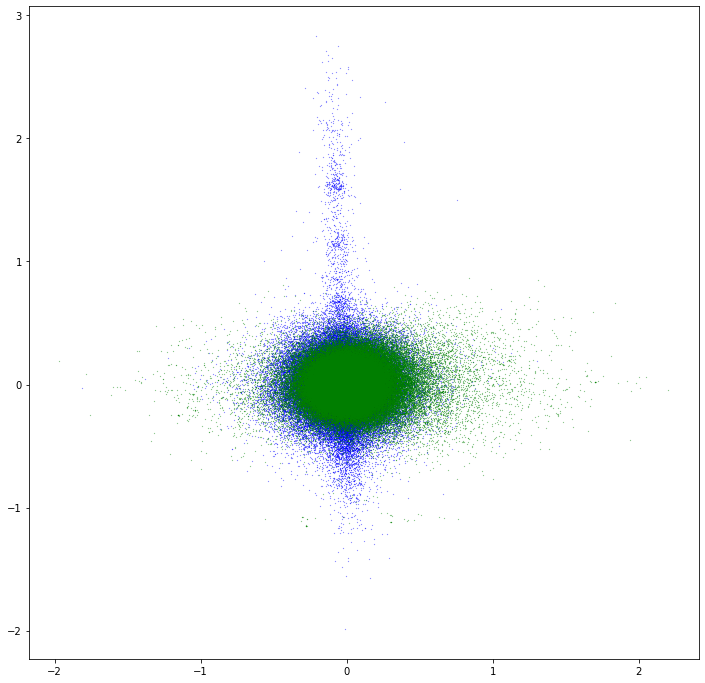

In [18]:
plt.figure(figsize=(12, 12))
plt.scatter(reduced_user_embeddings[0], reduced_user_embeddings[1], c='blue', s=0.03)
plt.scatter(reduced_item_embeddings[0], reduced_item_embeddings[1], c='green', s=0.03)

In [19]:
item_mapping = {v: k for k, v in model.item_mapping_.items()}
user_mapping = {v: k for k, v in model.user_mapping_.items()}

In [20]:
reduced_item_embeddings = reduced_item_embeddings.rename(index=item_mapping)

In [21]:
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)

In [22]:
reduced_item_embeddings = reduced_item_embeddings.join(categories.set_index('asin'))

In [23]:
reduced_item_embeddings.columns = ['0', '1', 'category_1', 'category_2']

<AxesSubplot:xlabel='0', ylabel='1'>

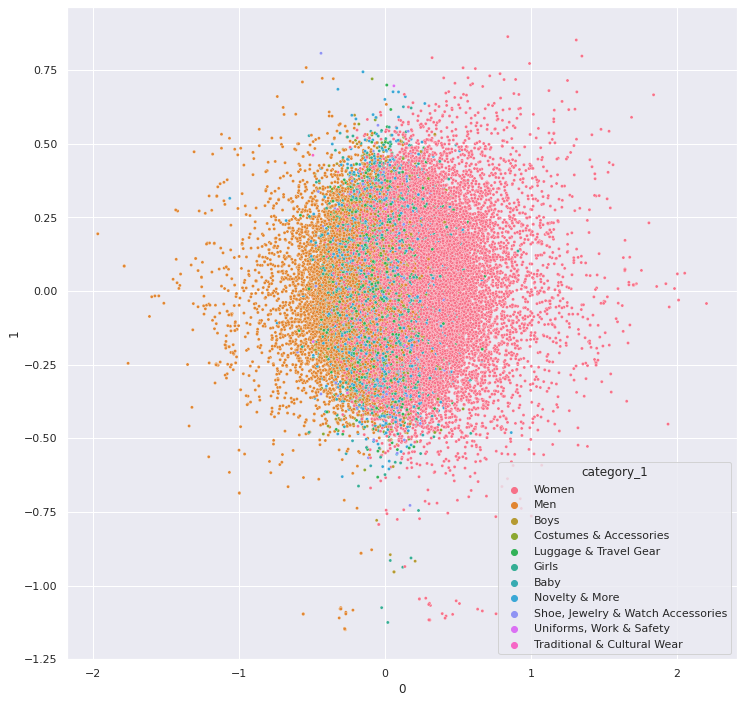

In [24]:
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings, hue='category_1', s=10)

<AxesSubplot:xlabel='0', ylabel='1'>

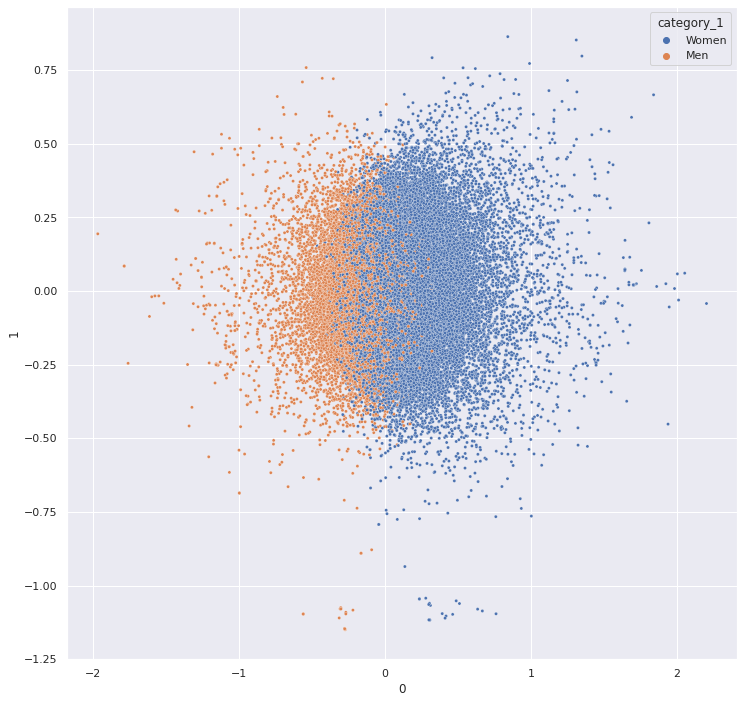

In [25]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10)